In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical, normalize
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
y_train.shape
y_train_label = y_train.copy()
y_test_label = y_test.copy()

In [5]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Boot']

Boot


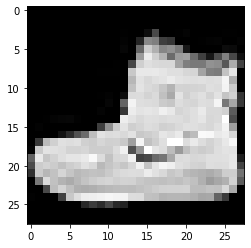

T-shirt


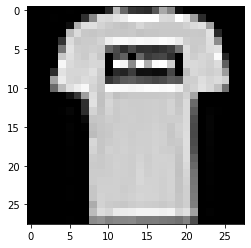

T-shirt


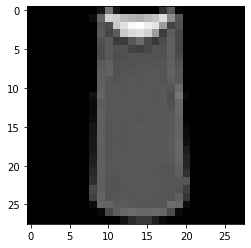

Dress


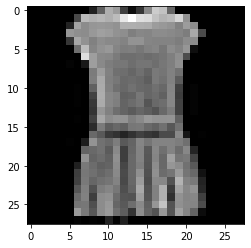

T-shirt


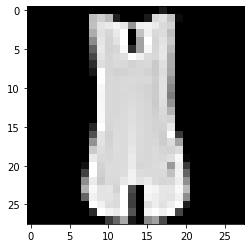

Pullover


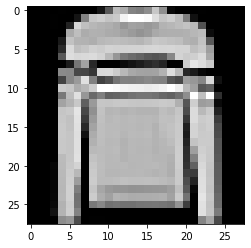

Sneaker


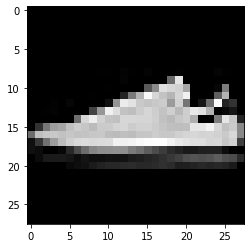

Pullover


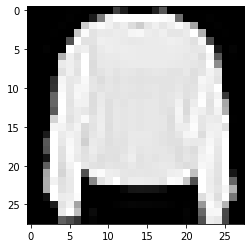

Sandal


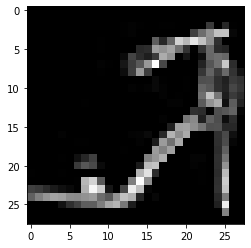

Sandal


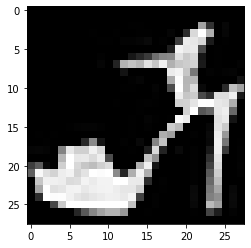

In [7]:
for i in range(10):
    plt.imshow(x_train[i], cmap="gray")
    print(class_names[y_train[i]])
    plt.show()

In [8]:
x_train[0].shape

(28, 28)

In [9]:
x_train[0].shape

(28, 28)

In [10]:
x_train = normalize(x_train,axis=1)
x_test = normalize(x_test,axis=1)

In [11]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [12]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [13]:
print(class_names[y_train_label[0]],":", y_train[0],":",y_train_label[0])

Boot : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.] : 9


In [14]:
#model1
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation="relu"))

model.add(Dropout(0.25))

model.add(Dense(10,activation="softmax"))

model.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 256)               1179904   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                        

In [16]:
model.fit(x_train,y_train,verbose=1,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.4415 - accuracy: 0.8385
Epoch 2/10
1875/1875 [==============================] - 20s 10ms/step - loss: 0.3060 - accuracy: 0.8875
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2686 - accuracy: 0.8990
Epoch 4/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2417 - accuracy: 0.9087
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.2181 - accuracy: 0.9164
Epoch 6/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1993 - accuracy: 0.9244
Epoch 7/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1818 - accuracy: 0.9306
Epoch 8/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1654 - accuracy: 0.9355
Epoch 9/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.1530 - accuracy: 0.9410
Epoch 10/10
1875/1875 [==============================] - 19s 10m

In [17]:
prediction_1 = model.predict(x_test)

313/313 [==============================] - 1s 4ms/step


In [18]:
val_loss_1, val_acc_1 = model.evaluate(x_test, y_test)
print(val_loss_1,"\n",val_acc_1)

313/313 [==============================] - 2s 4ms/step - loss: 0.2916 - accuracy: 0.9049
0.2916348874568939 
 0.9049000144004822


In [19]:
from sklearn.metrics import classification_report

y_test_class=np.argmax(y_test,axis=1)
pred_class=np.argmax(prediction_1,axis=1)

print("Classification Report: \n", classification_report(y_test_class, pred_class))

Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.89      0.85      1000
           1       0.99      0.98      0.98      1000
           2       0.86      0.82      0.84      1000
           3       0.92      0.91      0.91      1000
           4       0.82      0.87      0.84      1000
           5       0.99      0.97      0.98      1000
           6       0.77      0.69      0.73      1000
           7       0.97      0.95      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.95      0.98      0.96      1000

    accuracy                           0.90     10000
   macro avg       0.91      0.90      0.90     10000
weighted avg       0.91      0.90      0.90     10000



In [20]:
#model2
model2 = Sequential()

model2.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation="relu"))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation="relu"))
model2.add(MaxPool2D(pool_size=(2,2)))

model2.add(Flatten())

model2.add(Dense(256,activation="relu"))
model2.add(Dense(256,activation="relu"))

model2.add(Dropout(0.5))

model2.add(Dense(10,activation="softmax"))

model2.compile(loss="categorical_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

In [21]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 32)          16416     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 32)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 256)              

In [22]:
model2.fit(x_train,y_train,verbose=1,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.5536 - accuracy: 0.7933
Epoch 2/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3658 - accuracy: 0.8652
Epoch 3/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.3164 - accuracy: 0.8813
Epoch 4/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2826 - accuracy: 0.8932
Epoch 5/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2588 - accuracy: 0.9032
Epoch 6/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2393 - accuracy: 0.9097
Epoch 7/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2228 - accuracy: 0.9161
Epoch 8/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.2064 - accuracy: 0.9215
Epoch 9/10
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1950 - accuracy: 0.9243
Epoch 10/10
1875/1875 [==============================] - 20s 11m

In [23]:
prediction_2 = model2.predict(x_test)

313/313 [==============================] - 1s 4ms/step


In [24]:
val_loss_2, val_acc_2 = model2.evaluate(x_test, y_test)
print(val_loss_2,"\n",val_acc_2)

313/313 [==============================] - 1s 4ms/step - loss: 0.3237 - accuracy: 0.8947
0.32368946075439453 
 0.8946999907493591


In [25]:
y_test_class2=np.argmax(y_test,axis=1)
pred_class2=np.argmax(prediction_2,axis=1)

print("Classification Report: \n", classification_report(y_test_class2, pred_class2))

Classification Report: 
               precision    recall  f1-score   support

           0       0.86      0.83      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.87      0.77      0.82      1000
           3       0.88      0.92      0.90      1000
           4       0.75      0.91      0.83      1000
           5       0.98      0.98      0.98      1000
           6       0.74      0.66      0.70      1000
           7       0.93      0.98      0.96      1000
           8       0.97      0.98      0.97      1000
           9       0.99      0.94      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.90      0.89      0.89     10000
weighted avg       0.90      0.89      0.89     10000



In [26]:
# so our first model perform better

Boot


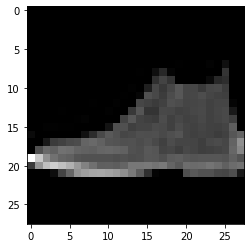

Pullover


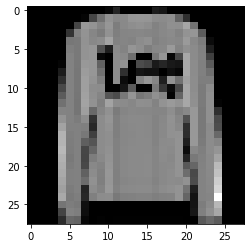

Trouser


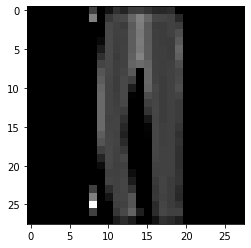

Trouser


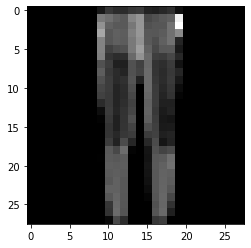

Shirt


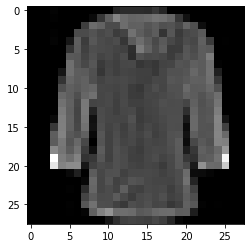

Trouser


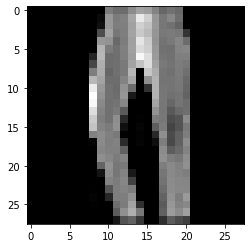

Coat


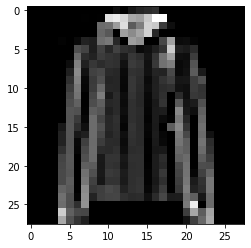

Shirt


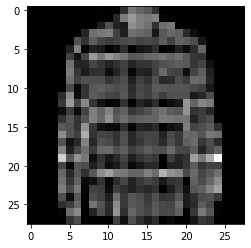

Sandal


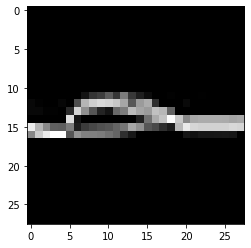

Sneaker


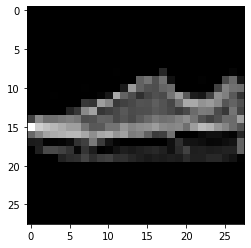

Coat


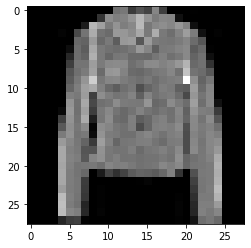

Sandal


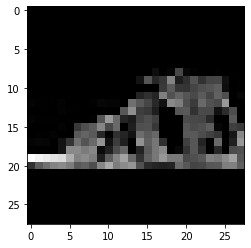

Sneaker


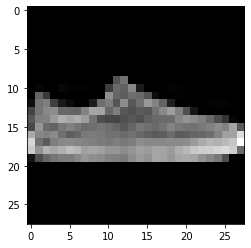

Dress


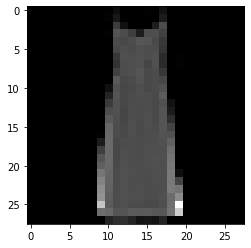

Coat


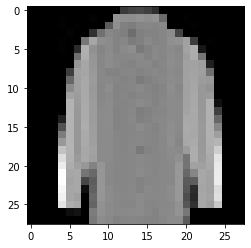

Trouser


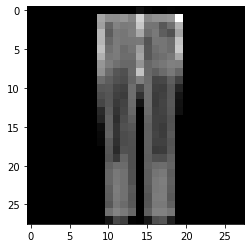

Pullover


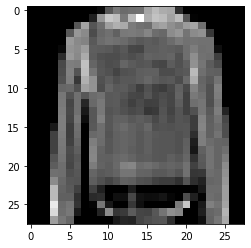

Coat


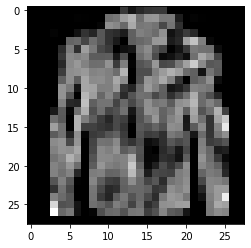

Bag


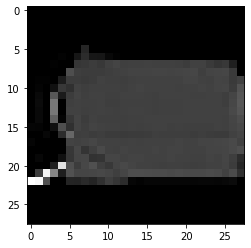

T-shirt


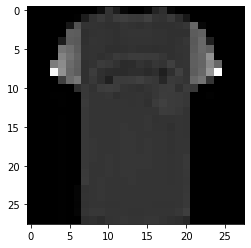

In [27]:
for i in range(20):
    plt.imshow(x_test[i],cmap="gray")
    print(class_names[pred_class[i]])
    plt.show()